In [2]:
#import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#read the dataset
df = pd.read_csv('airlines_delay.csv')

In [4]:
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [5]:
#No. of Delays (Delayed = 1, No Delay = 0)
delay = df['Class'].value_counts()
delay
delay_count = df['Class'].sum()
delay_count

240264

In [6]:
#Finding the percentage of delayed flights 
total_flights = len(df)
total_flights
percentage_delayed_flights = delay_count/total_flights
percentage_delayed_flights

0.44544311823531374

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8452\42513990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay.index, y=delay.values, palette='viridis')


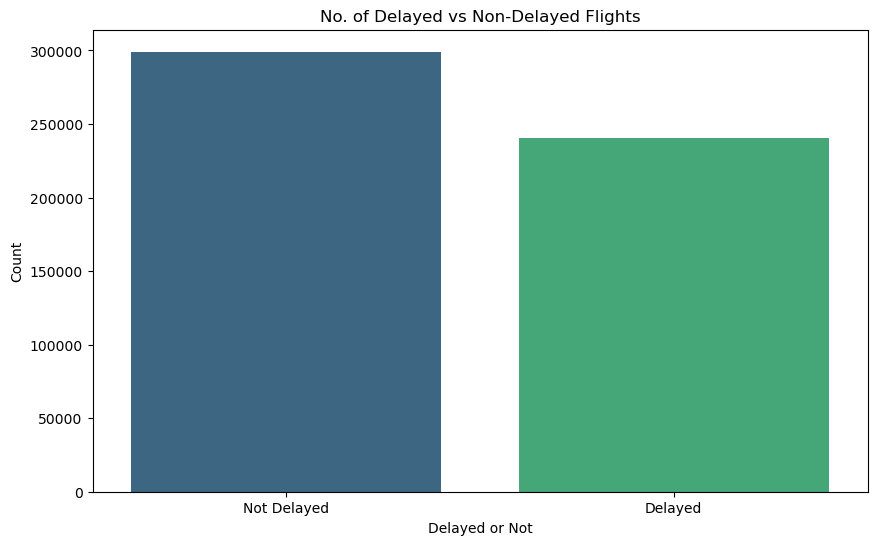

In [8]:
# Bar plot for Delayed vs. Non-Delayed Flights
plt.figure(figsize=(10, 6))
sns.barplot(x=delay.index, y=delay.values, palette='viridis')
plt.title('No. of Delayed vs Non-Delayed Flights')
plt.xlabel('Delayed or Not')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Delayed', 'Delayed'])
plt.show()

In [11]:
# Convert minutes past midnight to the hour (truncate)
df['Hour of Departure'] = (df['Time'] // 60).astype(int)
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,Hour of Departure
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0,21
1,6948.0,360.0,146.0,OO,COS,ORD,4,0,6
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0,19
3,31.0,1410.0,344.0,US,OGG,PHX,6,0,23
4,563.0,692.0,98.0,FL,BMI,ATL,4,0,11
...,...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1,8
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1,9
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1,13
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1,11


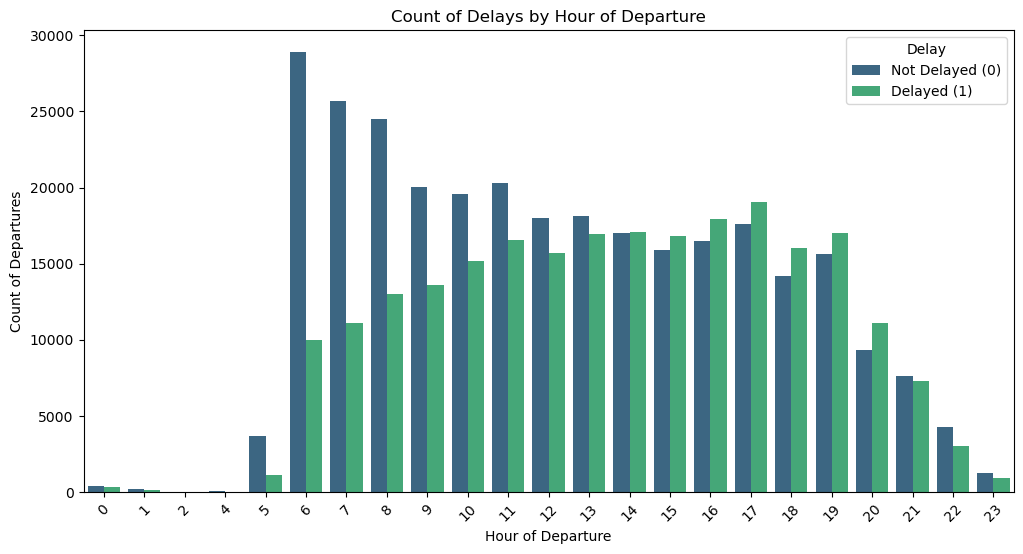

In [14]:
# Count plot for delays based on hour of departure
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour of Departure', hue='Class', data=df, palette='viridis')
plt.title('Count of Delays by Hour of Departure')
plt.xlabel('Hour of Departure')
plt.ylabel('Count of Departures')
plt.xticks(rotation=45)
plt.legend(title='Delay', labels=['Not Delayed (0)', 'Delayed (1)'])
plt.show()


C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


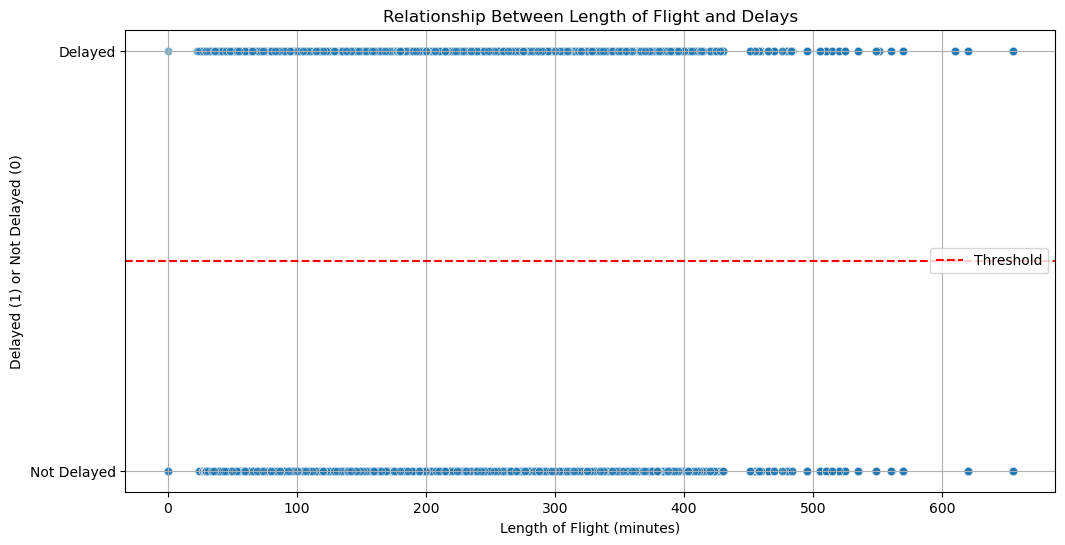

In [17]:
# Scatter plot for length of flight and delays
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Length', y='Class', data=df, alpha=0.6)
plt.title('Relationship Between Length of Flight and Delays')
plt.xlabel('Length of Flight (minutes)')
plt.ylabel('Delayed (1) or Not Delayed (0)')
plt.yticks([0, 1], ['Not Delayed', 'Delayed'])
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8452\2363269282.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Flight Length Category', y='Class', data=df, palette='viridis')


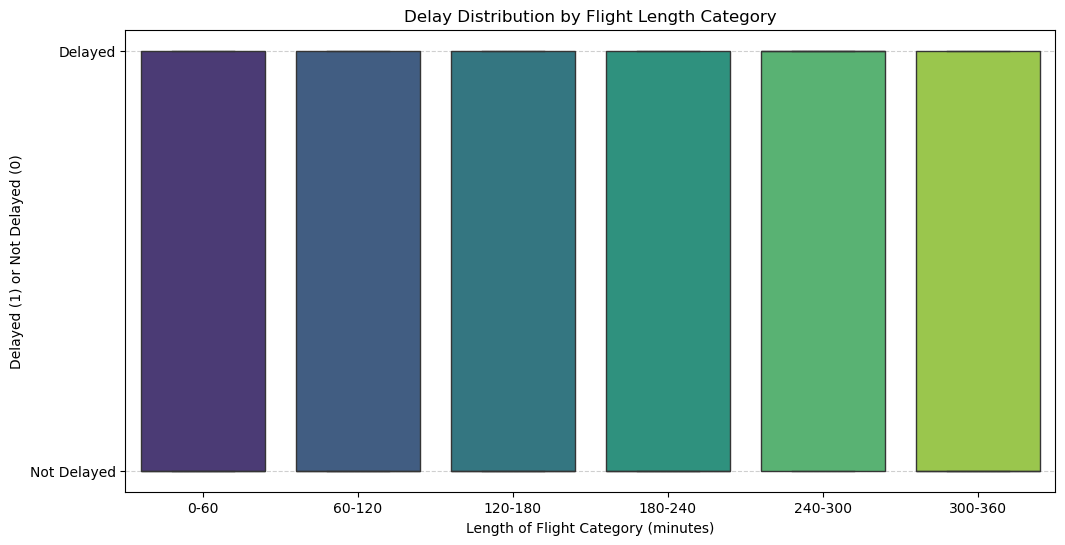

In [20]:
# Create bins for Length of Flight
bins = [0, 60, 120, 180, 240, 300, 360]  # Adjust the bins as needed
labels = ['0-60', '60-120', '120-180', '180-240', '240-300', '300-360']

# Create the Flight Length Category using the updated column name
df['Flight Length Category'] = pd.cut(df['Length'], bins=bins, labels=labels)

# Boxplot for length of flight categories and delays
plt.figure(figsize=(12, 6))
sns.boxplot(x='Flight Length Category', y='Class', data=df, palette='viridis')
plt.title('Delay Distribution by Flight Length Category')
plt.xlabel('Length of Flight Category (minutes)')
plt.ylabel('Delayed (1) or Not Delayed (0)')
plt.yticks([0, 1], ['Not Delayed', 'Delayed'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



In [22]:
# Count the number of flights for each airline
flight_counts = df['Airline'].value_counts()
print(flight_counts)  # This will show you the counts for each airline


Airline
WN    94097
DL    60940
OO    50254
AA    45656
MQ    36604
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8452\2639317184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_counts.index, y=flight_counts.values, palette='viridis')


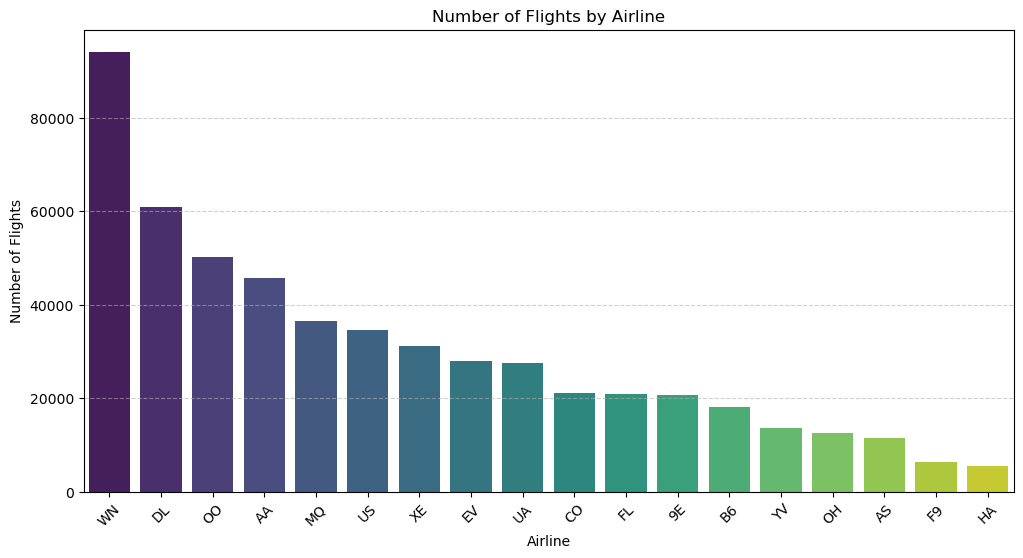

In [23]:
# Create a bar plot for the number of flights per airline
plt.figure(figsize=(12, 6))
sns.barplot(x=flight_counts.index, y=flight_counts.values, palette='viridis')
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [24]:
# Calculate the total number of flights and the number of delayed flights for each airline
delay_counts = df.groupby('Airline')['Class'].value_counts().unstack(fill_value=0)

# Calculate the percentage of delays for each airline
delay_percentage = (delay_counts[1] / (delay_counts[0] + delay_counts[1])) * 100
delay_percentage = delay_percentage.sort_values(ascending=False)  # Sort for better visualization

print(delay_percentage)  # This will show you the percentage of delays for each airline


Airline
WN    69.775870
CO    56.619945
B6    46.703843
OO    45.289927
DL    45.047588
F9    44.903965
EV    40.220848
9E    39.766025
AA    38.847030
XE    37.894365
MQ    34.810403
AS    33.929038
US    33.597101
UA    32.390746
HA    32.018645
FL    30.129159
OH    27.727633
YV    24.291439
dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8452\676373862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_percentage.index, y=delay_percentage.values, palette='viridis')


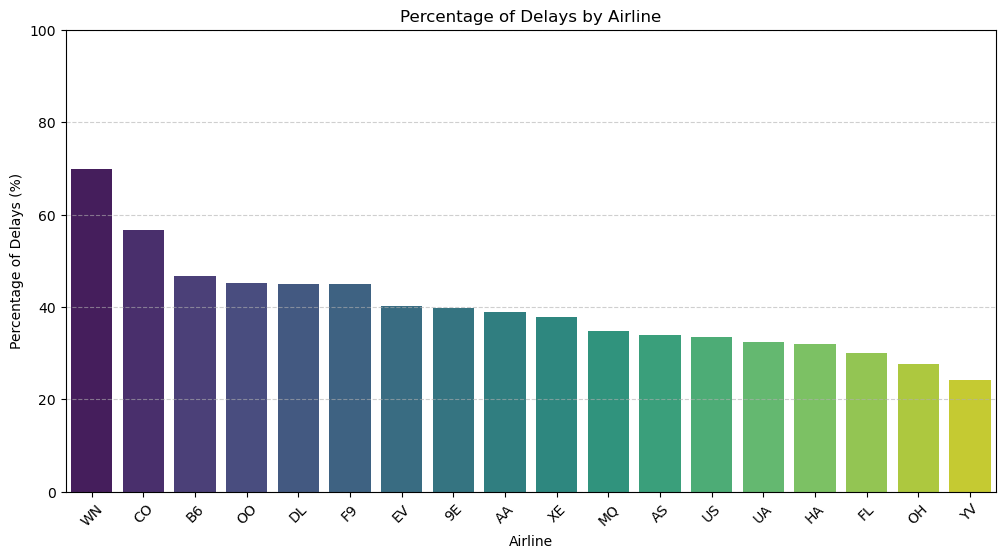

In [25]:
# Create a bar plot for the percentage of delays per airline
plt.figure(figsize=(12, 6))
sns.barplot(x=delay_percentage.index, y=delay_percentage.values, palette='viridis')
plt.title('Percentage of Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Percentage of Delays (%)')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100%
plt.show()

In [26]:
# Count the number of flights from each airport
airport_counts = df['AirportFrom'].value_counts()
print(airport_counts)  # This will show you the counts for each airport


AirportFrom
ATL    34449
ORD    24822
DFW    22153
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: count, Length: 293, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8452\1145560289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airport_counts.index, y=airport_counts.values, palette='viridis')


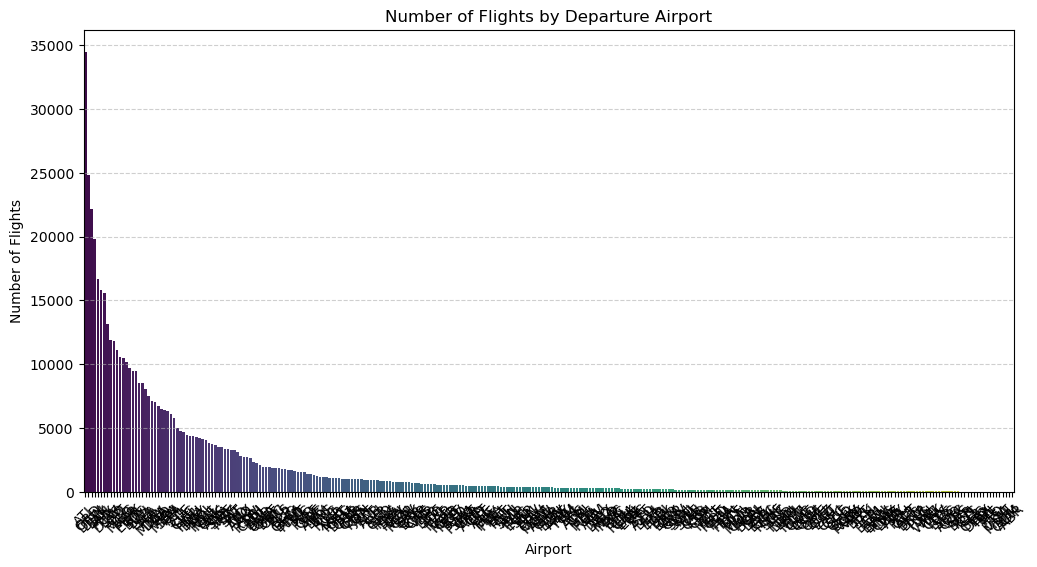

In [27]:
# Create a bar plot for the number of flights from each airport
plt.figure(figsize=(12, 6))
sns.barplot(x=airport_counts.index, y=airport_counts.values, palette='viridis')
plt.title('Number of Flights by Departure Airport')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [28]:
# Calculate the number of delays for each airport
airport_delay_counts = df.groupby('AirportFrom')['Class'].value_counts().unstack(fill_value=0)

# Calculate the total number of flights and the number of delayed flights
airport_delay_counts['Total Flights'] = airport_delay_counts[0] + airport_delay_counts[1]
airport_delay_counts['Delay Percentage'] = (airport_delay_counts[1] / airport_delay_counts['Total Flights']) * 100

# Sort by delay percentage for better visualization
airport_delay_counts = airport_delay_counts.sort_values('Delay Percentage', ascending=False)

# Print the resulting DataFrame
print(airport_delay_counts[['Total Flights', 1, 'Delay Percentage']])


Class        Total Flights     1  Delay Percentage
AirportFrom                                       
MDW                   7103  5222         73.518232
DAL                   3838  2748         71.599792
OAK                   3783  2697         71.292625
HOU                   4420  2949         66.719457
OTH                     93    59         63.440860
...                    ...   ...               ...
TEX                     27     4         14.814815
GTR                     61     9         14.754098
HTS                     57     7         12.280702
FLG                    219    26         11.872146
TXK                     77     9         11.688312

[293 rows x 3 columns]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8452\4294843980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airport_delay_counts.index, y=airport_delay_counts['Delay Percentage'], palette='viridis')


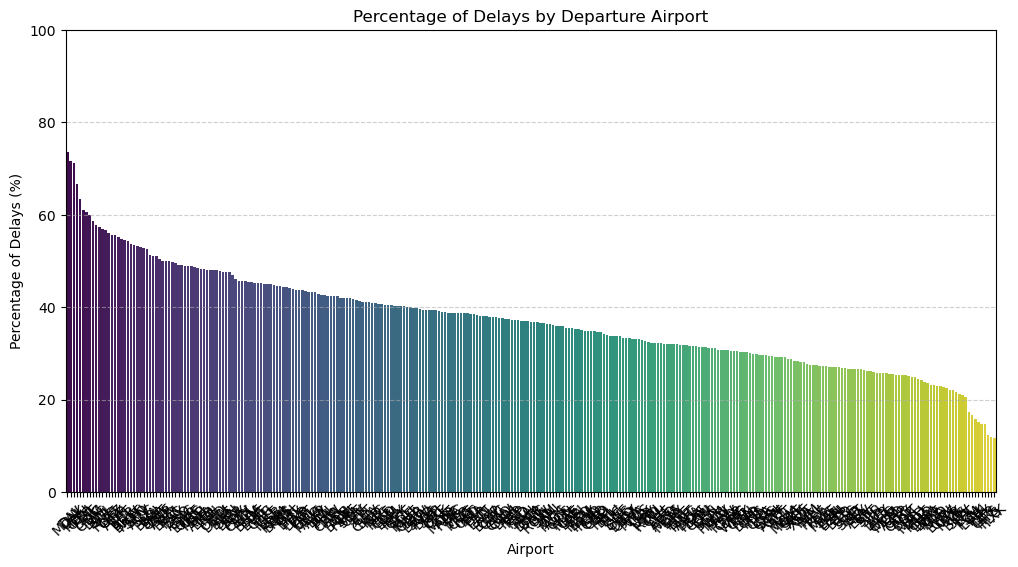

In [29]:
# Create a bar plot for the delay percentage per airport
plt.figure(figsize=(12, 6))
sns.barplot(x=airport_delay_counts.index, y=airport_delay_counts['Delay Percentage'], palette='viridis')
plt.title('Percentage of Delays by Departure Airport')
plt.xlabel('Airport')
plt.ylabel('Percentage of Delays (%)')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100%
plt.show()


In [30]:
# Count the number of flights for each day of the week
day_counts = df['DayOfWeek'].value_counts().sort_index()

# Print the resulting counts for verification
print(day_counts)

DayOfWeek
1    72769
2    71340
3    89746
4    91445
5    85247
6    58956
7    69879
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8452\1874916636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')


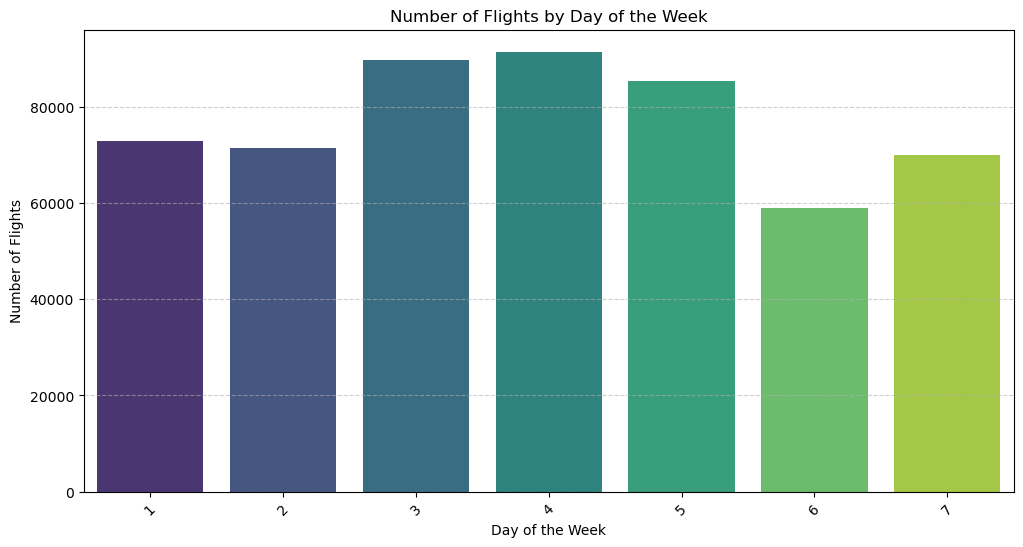

In [31]:
# Create a bar plot for the number of flights for each day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title('Number of Flights by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [32]:
# Calculate the number of delays for each day of the week
day_delay_counts = df.groupby('DayOfWeek')['Class'].value_counts().unstack(fill_value=0)

# Calculate the total number of flights and the number of delayed flights
day_delay_counts['Total Flights'] = day_delay_counts[0] + day_delay_counts[1]
day_delay_counts['Delay Percentage'] = (day_delay_counts[1] / day_delay_counts['Total Flights']) * 100

# Sort the DataFrame for better visualization
day_delay_counts = day_delay_counts.sort_index()

# Print the resulting DataFrame for verification
print(day_delay_counts[['Total Flights', 1, 'Delay Percentage']])

Class      Total Flights      1  Delay Percentage
DayOfWeek                                        
1                  72769  34030         46.764419
2                  71340  31913         44.733670
3                  89746  42254         47.081764
4                  91445  41244         45.102521
5                  85247  35515         41.661290
6                  58956  23615         40.055295
7                  69879  31693         45.354112


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8452\651769673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_delay_counts.index, y=day_delay_counts['Delay Percentage'], palette='viridis')


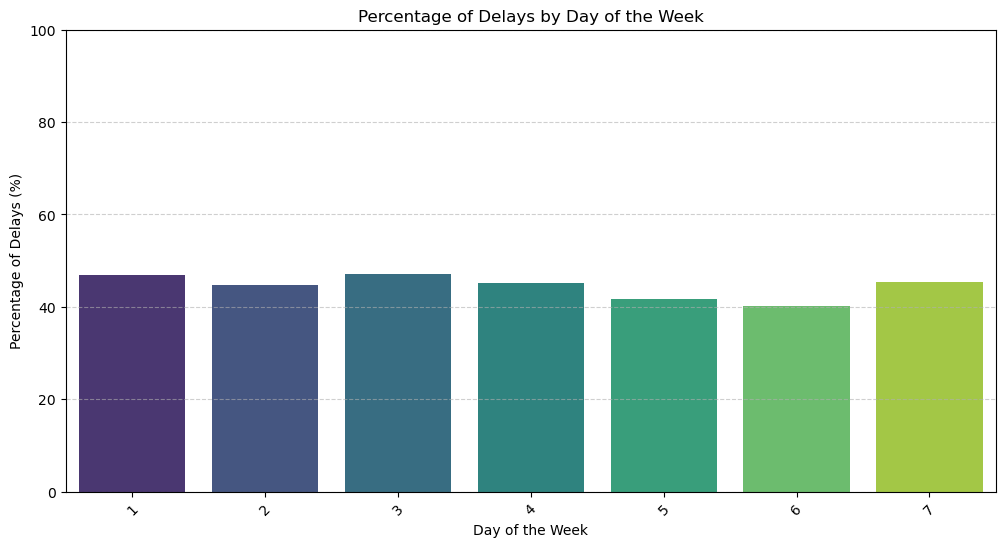

In [33]:
# Create a bar plot for the delay percentage per day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=day_delay_counts.index, y=day_delay_counts['Delay Percentage'], palette='viridis')
plt.title('Percentage of Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Delays (%)')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()